In [214]:
import os
import numpy as np

# Librerias para graficacion (trazado de graficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

Body Fat Prediction Dataset

Conjunto de datos de predicción de grasa corporal


In [215]:
# Leer datos
#Carga de dataset
#data = pd.read_csv('/content/pizza_v1.csv')
data = pd.read_csv('covid.csv')
print(data)
data.info()
#data = np.loadtxt('ejemplo02.txt', delimiter=',')


     SR.No     Country/other  Total_cases  Total_deaths  Total_recovered  \
0        1               USA    107715650       1171803        105773383   
1        2             India     44996198        531920         44462773   
2        3            France     40138560        167642         39970918   
3        4           Germany     38428685        174352         38240600   
4        5            Brazil     37739057        704897         36249161   
..     ...               ...          ...           ...              ...   
225    226              Niue          829             0              825   
226    227  Diamond Princess          712            13              699   
227    228           Tokelau           80             0                0   
228    229      Vatican City           29             0               29   
229    230    Western Sahara           10             1                9   

     Active_cases  Serious_cases  Total_tests  Population  
0          770464          

In [216]:
num_labels = data['Country/other'].nunique()
print("Número de etiquetas únicas para Country:", num_labels)


Número de etiquetas únicas para Country: 230


In [217]:
# Eliminar las columnas innecesarias del DataFrame
columns_to_drop = ['SR.No','Country/other']
data = data.drop(columns=columns_to_drop)

Variable objetivo (y):
    "Grasa corporal": Esta sería tu variable objetivo y. Es lo que intentas predecir en función de las otras mediciones.

Variables predictoras (x):
Densidad     Edad    Peso   Altura   Cuello   Pecho  Abdomen   Cadera   Muslo   Rodilla   Tobillo   Biceps   Antebrazo   Munieca

In [218]:
# Extraer la columna "Grasa corporal"
Total_cases   = data['Total_cases']

# Eliminar la columna "Grasa corporal" del DataFrame original
data = data.drop(columns=['Total_cases'])

# Agregar la columna "Grasa corporal" al final del DataFrame
data['Total_cases'] = Total_cases  


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Total_deaths     230 non-null    int64
 1   Total_recovered  230 non-null    int64
 2   Active_cases     230 non-null    int64
 3   Serious_cases    230 non-null    int64
 4   Total_tests      230 non-null    int64
 5   Population       230 non-null    int64
 6   Total_cases      230 non-null    int64
dtypes: int64(7)
memory usage: 12.7 KB


In [220]:
# Lectura de Datos división de matrices
#X, y = data[:, :15], data[:,15]
#m = y.size

# Lectura de Datos DataFrame en Pandas
X = data.iloc[:, :6]
y = data.iloc[:, 6]
m = y.size

In [221]:
"""from sklearn.model_selection import train_test_split

# Divide el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
X = X_train
y = y_train
m = y.size
print(X_test)
print(type(X))
print(y)
print(type(y_test))"""
#print(X)
print(y)
print(type(X))
print(type(y))

0      107715650
1       44996198
2       40138560
3       38428685
4       37739057
         ...    
225          829
226          712
227           80
228           29
229           10
Name: Total_cases, Length: 230, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [222]:
X.shape
y.shape

(230,)

In [223]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [224]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

#print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

Media calculada: Total_deaths       3.003053e+04
Total_recovered    2.715209e+06
Active_cases       3.169649e+04
Serious_cases      2.891304e+01
Total_tests        3.043233e+07
Population         3.454320e+07
dtype: float64
Desviación estandar calculada: Total_deaths       1.065802e+05
Total_recovered    9.353436e+06
Active_cases       1.310951e+05
Serious_cases      1.053615e+02
Total_tests        1.149379e+08
Population         1.380522e+08
dtype: float64
     Total_deaths  Total_recovered  Active_cases  Serious_cases  Total_tests  \
0       10.712799        11.018215      5.635357       8.210656    10.012493   
1        4.709030         4.463340     -0.230302      -0.274418     7.833499   
2        1.291154         3.983104     -0.241782       7.973377     2.097288   
3        1.354111         3.798111     -0.137026      -0.274418     0.799563   
4        6.332005         3.585201      5.746231      -0.274418     0.290103   
..            ...              ...           ...          

In [225]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

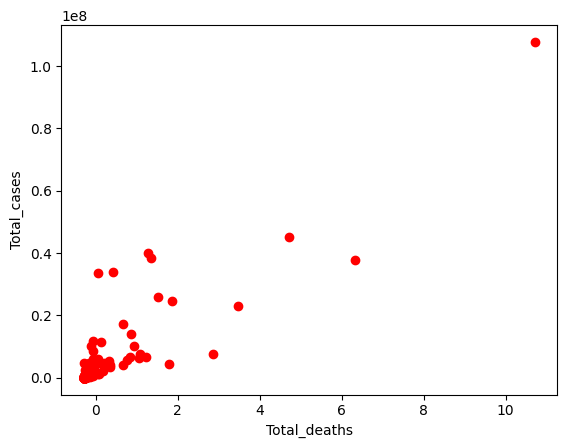

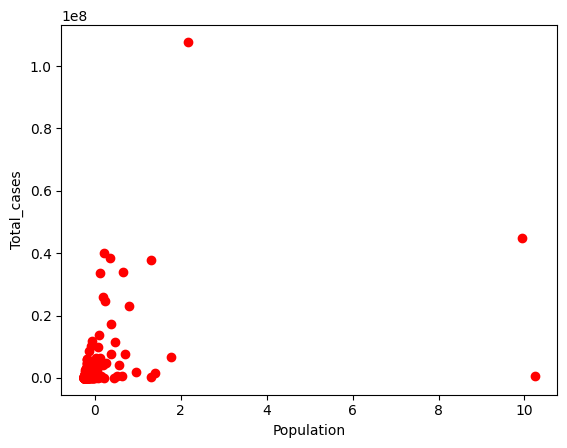

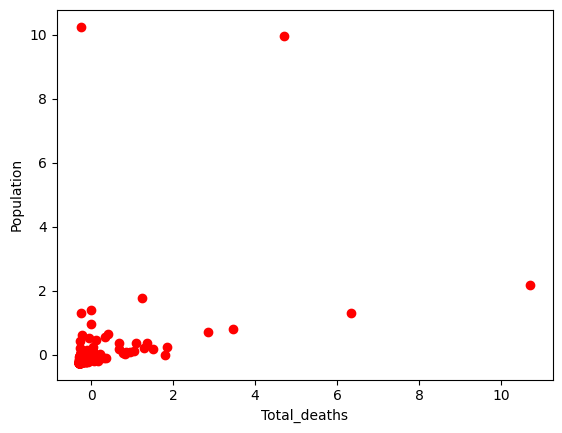

In [226]:
xlabel1 = "Total_deaths"
xlabel2 = "Population"
ylabel1 = "Total_cases"

graficarDatos(X_norm.iloc[:, 0], y, xlabel1, ylabel1)  # Gráfica de Total_deaths vs Total_cases
graficarDatos(X_norm.iloc[:, 5], y, xlabel2, ylabel1)  # Gráfica de Population vs Total_cases
graficarDatos(X_norm.iloc[:, 0], X_norm.iloc[:, 5], xlabel1, xlabel2)  # Gráfica de Total_deaths vs Population

#graficarDatos(X_norm[:, 0], y, xlabel1, ylabel1)
#graficarDatos(X_norm[:, 1], y, xlabel2, ylabel1)
#graficarDatos(X_norm[:, 0], X_norm[:, 1], xlabel1, xlabel2)


In [227]:
# No olvidarse agregar unos a la matriz de x
#munos = np.ones([m, 1]).unsqueese
#print(munos.shape)
#X = np.stack([np.ones(m), X], axis=1)
#X = np.stack([X, munos], axis=1)
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
# X = np.insert(X, 0, 1, axis=1)
# X.shape

In [228]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [229]:
fila_deseada = 100

if fila_deseada + 1 < len(data):  # Verifica que la fila siguiente exista
    fila_siguiente = data.iloc[fila_deseada + 1].to_numpy()
    fila_separada = ', '.join(map(str, fila_siguiente))  # Convierte los valores a cadenas y los une con comas
    print(fila_separada)
else:
    print("La fila siguiente no existe")


3602, 329428, 1696, 0, 1941032, 2866374, 334726


In [230]:
theta=np.array([ 1, 3602, 329428, 1696, 0, 1941032, 2866374])
JJ = calcularCosto(X_ready, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")
print(len(theta))

con theta:[      1    3602  329428    1696       0 1941032 2866374] se obtiene un costo de: 32737124881102.66
7


In [231]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    h = np.dot(X, theta)
    gradiente = np.dot(X.T, h - y) / m
    theta = theta - alpha * gradiente
    #theta = theta - (alpha / m) * np.dot(X.T, h - y)
    #theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

El objetivo del entrenamiento  es encontrar los valores de θθ que minimizan esta función de costo cuadrático J

los valores de theta calculados son: [1905650.19552854 2388115.78612357 3047049.49769085 1068199.79709279
 1411826.10825957 2246568.31797477  470466.21576686]
con un costo de: 5405134472646.777 


Text(0, 0.5, 'Costo J')

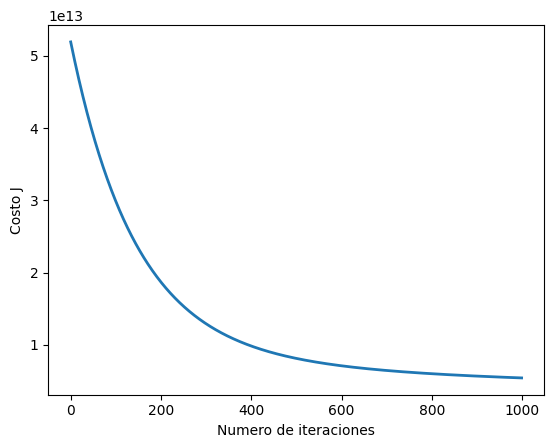

In [232]:
theta = np.zeros(7)
#theta = np.zeros((X_ready.shape[1], 1))  # Inicializar theta como un vector columna
num_ite = 1000
alpha = 0.001

theta, J_historico = calcularDescensoGradiente(X_ready, y.values, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')


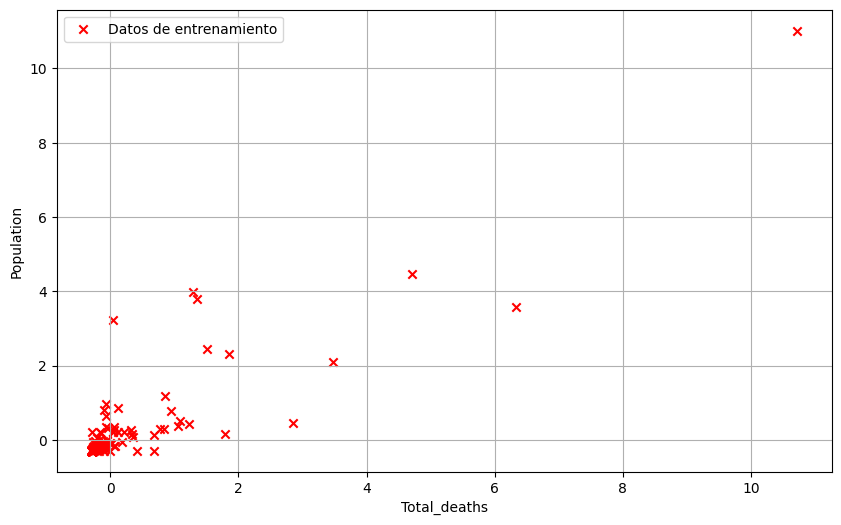

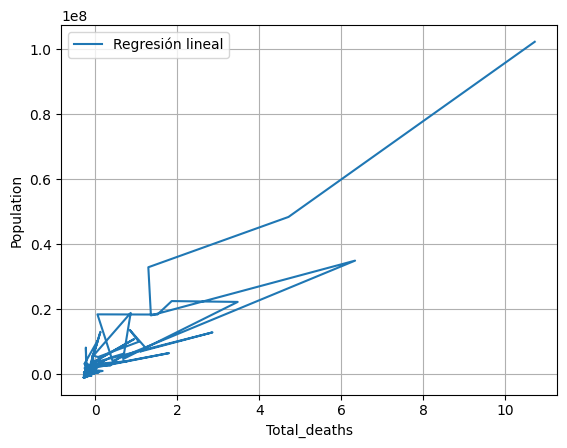

In [233]:
import matplotlib.pyplot as plt

# Función para graficar datos
def graficarDatos(x1, x2, xlabel1, xlabel2):
    plt.figure(figsize=(10, 6))
    plt.scatter(x1, x2, marker='x', c='r', label='Datos de entrenamiento')
    plt.xlabel(xlabel1)
    plt.ylabel(xlabel2)
    plt.legend()
    plt.grid(True)
    plt.show()

# Graficar Total_deaths vs Population con la línea de regresión lineal
graficarDatos(X_ready[:, 1], X_ready[:, 2], xlabel1, xlabel2)

# También puedes agregar la línea de regresión lineal
plt.plot(X_ready[:, 1], np.dot(X_ready, theta), '-', label='Regresión lineal')
plt.xlabel(xlabel1)
plt.ylabel(xlabel2)
plt.legend()
plt.grid(True)
plt.show()


In [234]:

y_pred = np.dot([ 1, 3602, 329428, 1696, 0, 1941032, 2866374], theta)
print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(y_pred))


El valor predecido es (usando el descenso por el gradiente): 6723392111620.7109


**Utilizando la ecuacion de la normal

In [235]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [236]:
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

In [237]:
theta = calcularThethaEcuacionNormal(X_ren, y);
print(f"los valores de theta calculados son: { theta }")


los valores de theta calculados son: [ 2.09545953e+05  7.50080042e+00  8.44419393e-01  1.23320506e+00
  2.06961565e+03  6.71157459e-03 -4.90193123e-04]


In [238]:
#otal_deaths  Total_recovered  Active_cases  Serious_cases  Total_tests population
X_array = [ 1, 3602, 329428, 1696, 0, 1941032, 2866374]
price = np.dot(X_array, theta) 

print('usando la ecuación de la normal para los casos totales de una poblacion de 2866374 es: {:.4f}'.format(price))

usando la ecuación de la normal para los casos totales de una poblacion de 2866374 es: 528453.0480
